In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
#!ls "/content/drive/My Drive/boot"
#path = '/content/drive/My Drive/boot/'
path = 'Dataset Pi/'

In [3]:
#sempre olhar o conjunto de dados com antenção

df1 = pd.read_csv(path+'Dataset-1.csv')
df1.head()

C:\ML\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,Id,Idade,EstadoCivil,BillingCity,NivelConhecimentoAtual,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,...,ValorMinimoAplicacaoAdicional,DataVencimento,FamiliaCarteira,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo,Status,ProdutoId
0,0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,30,M,Aracruz,1.0,1.0,2,1300.0,6000.0,...,30.0,NaN,Renda Fixa,30.0,NaN,0.0,0.37005375,1.0,Efetivada,a0W6A000009GZdgUAG
1,1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,150.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG
2,2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,50.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG
3,3,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,60.0,NaN,0.0,0.13178136,1.0,Efetivada,a0W6A000009GZdgUAG
4,4,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,40.0,NaN,0.0,0.15076414,1.0,Efetivada,a0W6A000009GZdgUAG


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38102 entries, 0 to 38101
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     38102 non-null  int64  
 1   Id                             38102 non-null  object 
 2   Idade                          38102 non-null  int64  
 3   EstadoCivil                    38102 non-null  object 
 4   BillingCity                    38075 non-null  object 
 5   NivelConhecimentoAtual         34956 non-null  float64
 6   ScoreNivelConhecimento         37577 non-null  float64
 7   PerfilInvestidor               38102 non-null  int64  
 8   RendaMensal                    38102 non-null  float64
 9   ValorPatrimonio                25650 non-null  float64
 10  Pergunta1                      37577 non-null  object 
 11  Resposta11                     37577 non-null  object 
 12  Pergunta2                      37577 non-null 

In [5]:
df1.describe()

,Unnamed: 0,Idade,NivelConhecimentoAtual,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,ScoreRisco,ScoreObjetivos,ScoreSituacaoFinanceira,TaxaCliente,TaxaPreCliente,ValorMinimoAplicaInicial,ValorMinimoAplicacaoAdicional,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RiscoAtivo
count,38102.000000,38102.000000,34956.000000,37577.000000,38102.000000,3.810200e+04,2.565000e+04,37577.000000,37577.000000,37577.000000,5614.000000,5615.000000,22746.000000,30929.000000,36483.000000,5421.000000,30861.000000,36476.000000
mean,19050.500000,37.230145,2.480804,2.533678,2.779959,8.368189e+03,9.122847e+05,2.671874,3.141815,2.124252,98.189526,0.413389,744.188094,360.480540,4046.749768,196.936554,9.666901,2.615309
std,10999.244315,11.365521,1.522709,1.538015,1.121397,2.754596e+04,1.498490e+07,1.109866,1.176798,1.012600,26.149983,1.776756,2344.743320,1032.730307,17034.380766,748.580640,18.926591,1.532361
min,0.000000,17.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.693346,0.000000
25%,9525.250000,29.000000,1.000000,1.000000,2.000000,2.000000e+03,4.000000e+04,2.000000,2.000000,1.000000,94.000000,0.000000,30.000000,30.000000,40.000000,7.490000,0.000000,1.000000
50%,19050.500000,36.000000,2.000000,2.000000,3.000000,4.200000e+03,2.000000e+05,3.000000,3.000000,2.000000,101.000000,0.000000,30.000000,30.000000,300.000000,28.080000,0.000000,2.000000
75%,28575.750000,43.000000,4.000000,4.000000,4.000000,1.000000e+04,7.000000e+05,3.000000,4.000000,3.000000,113.000000,0.000000,500.000000,100.000000,2000.000000,103.750000,11.122177,4.000000
max,38101.000000,96.000000,5.000000,5.000000,5.000000,2.400000e+06,1.500000e+09,5.000000,5.000000,5.000000,140.000000,12.000000,50000.000000,30000.000000,800000.000000,16834.210000,584.324863,5.000000


### -------------------------------------------- Analisando dataset 1


In [77]:
df1_limpa = df1.loc[(df1['PerfilInvestidor']!=0) & (df1['Produto'].isna()==False)]
df1_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36473 entries, 0 to 38100
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     36473 non-null  int64  
 1   Id                             36473 non-null  object 
 2   Idade                          36473 non-null  int64  
 3   EstadoCivil                    36473 non-null  object 
 4   BillingCity                    36446 non-null  object 
 5   NivelConhecimentoAtual         33892 non-null  float64
 6   ScoreNivelConhecimento         36468 non-null  float64
 7   PerfilInvestidor               36473 non-null  int64  
 8   RendaMensal                    36473 non-null  float64
 9   ValorPatrimonio                24800 non-null  float64
 10  Pergunta1                      36468 non-null  object 
 11  Resposta11                     36468 non-null  object 
 12  Pergunta2                      36468 non-null 

### Limpando as colunas de pergunda

In [78]:
#df1_limpa = df1_limpa.iloc[:,[1,2,3,4,5,6,7,8,9,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]]
df1_limpa = df1_limpa.iloc[:,[1,2,3,4,5,6,7,8,9,46,47,48,63]]
df1_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36473 entries, 0 to 38100
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       36473 non-null  object 
 1   Idade                    36473 non-null  int64  
 2   EstadoCivil              36473 non-null  object 
 3   BillingCity              36446 non-null  object 
 4   NivelConhecimentoAtual   33892 non-null  float64
 5   ScoreNivelConhecimento   36468 non-null  float64
 6   PerfilInvestidor         36473 non-null  int64  
 7   RendaMensal              36473 non-null  float64
 8   ValorPatrimonio          24800 non-null  float64
 9   ScoreRisco               36468 non-null  float64
 10  ScoreObjetivos           36468 non-null  float64
 11  ScoreSituacaoFinanceira  36468 non-null  float64
 12  RiscoAtivo               36466 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 3.9+ MB


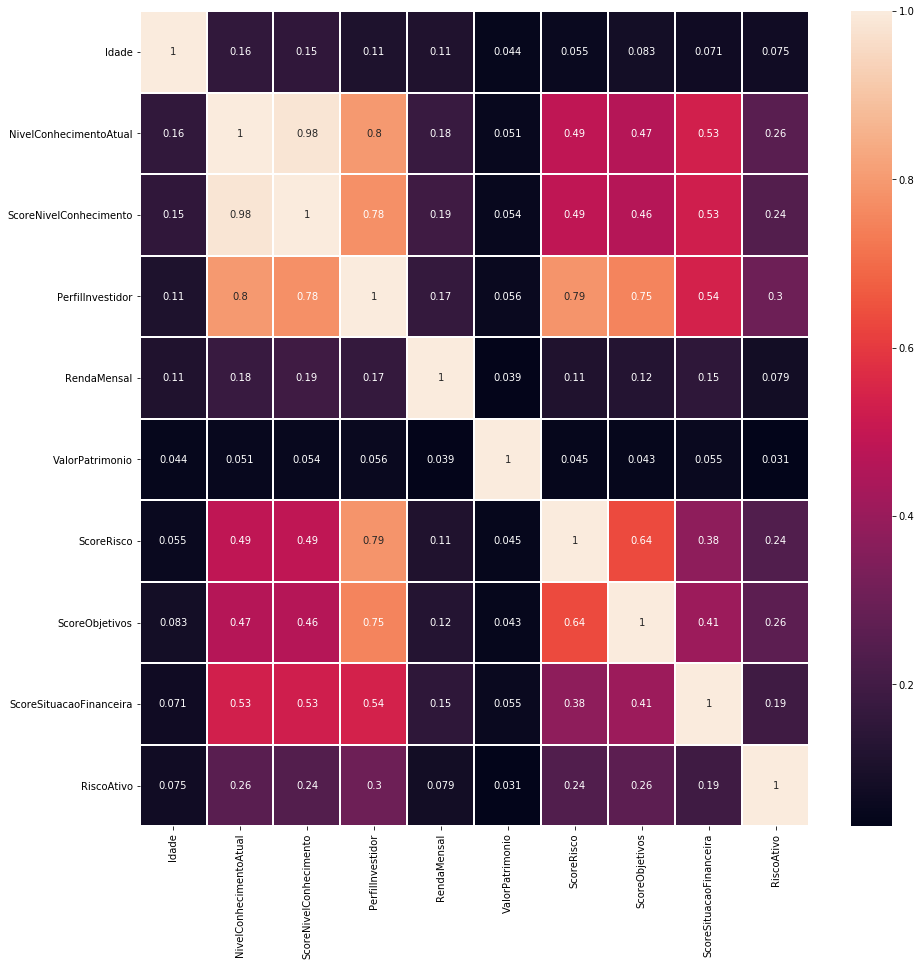

In [79]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df1_limpa.corr(),annot=True, linewidths=1.0, ax=ax)

In [80]:
df1_limpa['neutro'] = df1_limpa['PerfilInvestidor'] == df1_limpa['RiscoAtivo']
df1_limpa['conservadores'] = df1_limpa['PerfilInvestidor'] > df1_limpa['RiscoAtivo']
df1_limpa['agressivos'] = df1_limpa['PerfilInvestidor'] < df1_limpa['RiscoAtivo']
df1_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36473 entries, 0 to 38100
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       36473 non-null  object 
 1   Idade                    36473 non-null  int64  
 2   EstadoCivil              36473 non-null  object 
 3   BillingCity              36446 non-null  object 
 4   NivelConhecimentoAtual   33892 non-null  float64
 5   ScoreNivelConhecimento   36468 non-null  float64
 6   PerfilInvestidor         36473 non-null  int64  
 7   RendaMensal              36473 non-null  float64
 8   ValorPatrimonio          24800 non-null  float64
 9   ScoreRisco               36468 non-null  float64
 10  ScoreObjetivos           36468 non-null  float64
 11  ScoreSituacaoFinanceira  36468 non-null  float64
 12  RiscoAtivo               36466 non-null  float64
 13  neutro                   36473 non-null  bool   
 14  conservadores         

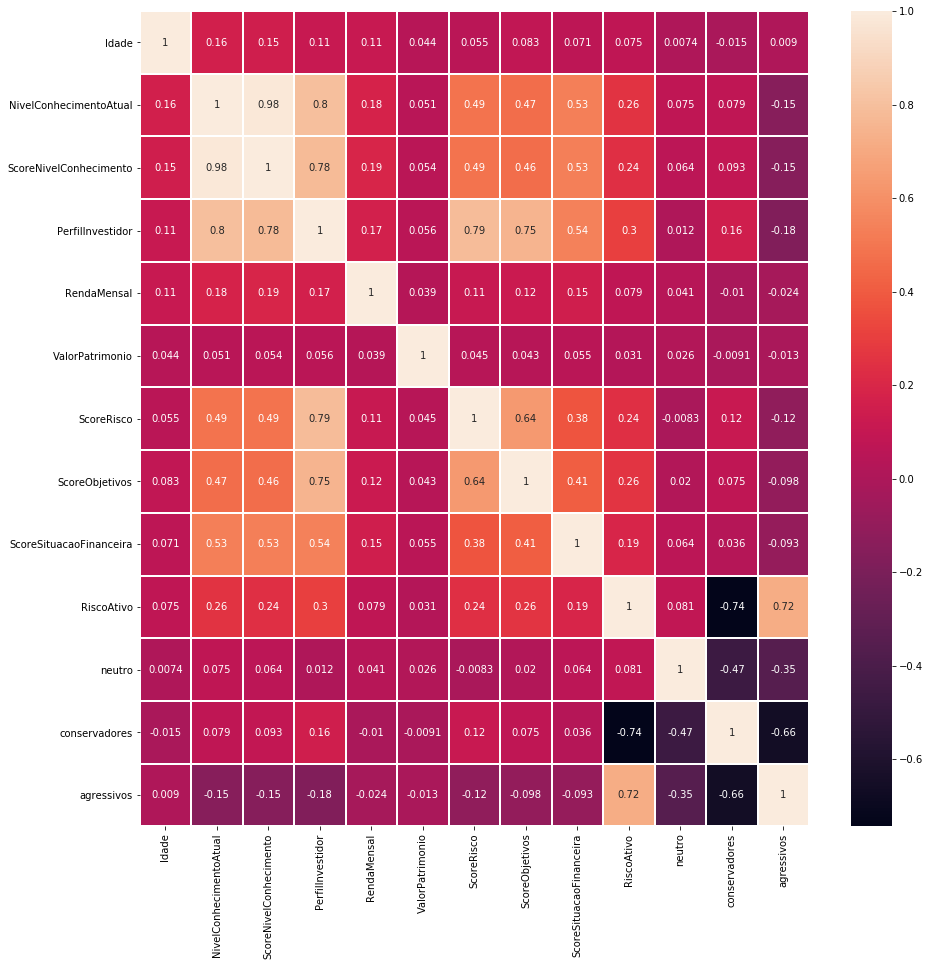

In [81]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df1_limpa.corr(),annot=True, linewidths=1.0, ax=ax)

In [111]:
# ideia de separar os tipos, mas não estou usando por hora
df1_neutros = df1_tree.loc[(df1['PerfilInvestidor'] == df1['RiscoAtivo'])]
df1_conservadores = df1_tree.loc[(df1['PerfilInvestidor'] > df1['RiscoAtivo'])]
df1_agressivos = df1_tree.loc[(df1['PerfilInvestidor'] < df1['RiscoAtivo'])]

In [82]:
# Trocando o estado civil por numeros
estCivMap = {'M':1, 'S':2, 'C':3, 'D':4, 'V':5, 'I':6}
df1_limpa["EstadoCivil"] = df1_limpa["EstadoCivil"].apply(lambda s: estCivMap.get(s) if s in estCivMap else s)
df1_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36473 entries, 0 to 38100
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       36473 non-null  object 
 1   Idade                    36473 non-null  int64  
 2   EstadoCivil              36473 non-null  int64  
 3   BillingCity              36446 non-null  object 
 4   NivelConhecimentoAtual   33892 non-null  float64
 5   ScoreNivelConhecimento   36468 non-null  float64
 6   PerfilInvestidor         36473 non-null  int64  
 7   RendaMensal              36473 non-null  float64
 8   ValorPatrimonio          24800 non-null  float64
 9   ScoreRisco               36468 non-null  float64
 10  ScoreObjetivos           36468 non-null  float64
 11  ScoreSituacaoFinanceira  36468 non-null  float64
 12  RiscoAtivo               36466 non-null  float64
 13  neutro                   36473 non-null  bool   
 14  conservadores         

In [83]:
# Tirando os valores "nulos" do campo que vamos usar que tem mais valores "nulos"
df1_tree = df1_tree.loc[(df1['ScoreRisco'].isna() == False)]
df1_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36468 entries, 0 to 38100
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       36468 non-null  object 
 1   Idade                    36468 non-null  int64  
 2   EstadoCivil              36468 non-null  int64  
 3   BillingCity              36441 non-null  object 
 4   NivelConhecimentoAtual   33892 non-null  float64
 5   ScoreNivelConhecimento   36468 non-null  float64
 6   PerfilInvestidor         36468 non-null  int64  
 7   RendaMensal              36468 non-null  float64
 8   ValorPatrimonio          24795 non-null  float64
 9   ScoreRisco               36468 non-null  float64
 10  ScoreObjetivos           36468 non-null  float64
 11  ScoreSituacaoFinanceira  36468 non-null  float64
 12  RiscoAtivo               36461 non-null  float64
 13  neutro                   36468 non-null  bool   
 14  conservadores         

## Inicio da arvore conservadora

In [90]:
df1_conservadores_X= df1_tree.iloc[:,[1,2,5,6,7,9,10,11]].values
df1_conservadores_y= df1_tree.iloc[:,14].values
X_train, X_test, y_train, y_test = train_test_split(df1_conservadores_X, df1_conservadores_y, test_size = .3, random_state=25)

In [91]:
classif_tree_conserv = DecisionTreeClassifier()
classif_tree_conserv.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
y_pred = classif_tree_conserv.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[4629, 1283],
       [1677, 3352]], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.73      0.78      0.76      5912
        True       0.72      0.67      0.69      5029

    accuracy                           0.73     10941
   macro avg       0.73      0.72      0.73     10941
weighted avg       0.73      0.73      0.73     10941



In [95]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7294580020107851


#### -------------------- Fim da arvore conservadora

## Inicio da arvore Agressiva

In [120]:
df1_agressivos_X= df1_tree.iloc[:,[1,2,5,6,7,9,10,11]].values
df1_agressivos_y= df1_tree.iloc[:,15].values
X_train, X_test, y_train, y_test = train_test_split(df1_agressivos_X, df1_agressivos_y, test_size = .3, random_state=25)

In [121]:
classif_tree_agress = DecisionTreeClassifier()
classif_tree_agress.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [122]:
y_pred = classif_tree_agress.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[6130, 1169],
       [1630, 2012]], dtype=int64)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.84      0.81      7299
        True       0.63      0.55      0.59      3642

    accuracy                           0.74     10941
   macro avg       0.71      0.70      0.70     10941
weighted avg       0.74      0.74      0.74     10941



In [125]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7441732931176309


#### -------------------- Fim da arvore agressiva

In [126]:
# Vamos testar para ver se achamos perfis
#df1_conservadores
#df1_agressivos

X= df1_agressivos.iloc[:,[1,2,5,6,7,9,10,11]].values
y= df1_agressivos.iloc[:,14].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [129]:
y_pred = classif_tree_conserv.predict(X_test)
y_pred
#print(classification_report(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))

array([False, False,  True, ..., False, False, False])